In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


この辺を参考にしながら、コードを書いていく：
https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

必要そうなライブラリをインポートする（随時加筆）

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid', font_scale = 1.4)

### データの全体感の確認

In [16]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

# (行数, 列数)
print('train.shape:', train.shape)
print('test.shape:', test.shape)

train.shape: (8693, 14)
test.shape: (4277, 13)


In [17]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 欠損値の確認

In [18]:
# trainの欠損値
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [19]:
# testの欠損値
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### 重複行の確認

In [20]:
train.duplicated().sum()

0

In [21]:
test.duplicated().sum()

0

### 特徴量について

各種の特徴量を、以下の3つに分類する：

- continuous
- categorical
- descriptive / qualitative

| 特徴量|aaa |
|---|--- |
| PassengerId | descriptive / qualitative |
| HomePlanet |categorical |
| CryoSleep |categorical |
| Cabin | descriptive / qualitative |
| Destination |categorical |
| Age |continuous |
| VIP | categorical |
| RoomService |continuous |
| FoodCourt |continuous |
| ShoppingMail |continuous |
| Spa | continuous|
| VRDeck |continuous |
| Name |descriptive / qualitative |

In [22]:
# datatypeの確認
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### 探索的データ解析

EDA（Exploratory Data Analysis）

...（後で加筆）

### Feature engineering

#### 年齢について

新しい特徴量である `Age_group` を定義する

In [23]:
# train
# Age_groupを定義し、空文字で初期化する
# np.nanによる初期化だと、データタイプの不整合が起きる
train['Age_group'] = ''

train.loc[train['Age'] <= 12, 'Age_group'] = 'Age_0-12'
train.loc[(train['Age'] > 12) & (train['Age'] < 18), 'Age_group'] = 'Age_13-17'
train.loc[(train['Age'] >= 18 ) & (train['Age'] <= 25), 'Age_group'] = 'Age_18-25'
train.loc[(train['Age'] > 25 ) & (train['Age'] <= 30), 'Age_group'] = 'Age_26-30'
train.loc[(train['Age'] >= 30 ) & (train['Age'] <= 50), 'Age_group'] = 'Age_31-50'
train.loc[train['Age'] > 50, 'Age_group'] = 'Age_51+'

In [24]:
# test
test['Age_group'] = ''

test.loc[test['Age'] <= 12, 'Age_group'] = 'Age_0-12'
test.loc[(test['Age'] > 12) & (test['Age'] < 18), 'Age_group'] = 'Age_13-17'
test.loc[(test['Age'] >= 18 ) & (test['Age'] <= 25), 'Age_group'] = 'Age_18-25'
test.loc[(test['Age'] > 25 ) & (test['Age'] <= 30), 'Age_group'] = 'Age_26-30'
test.loc[(test['Age'] >= 30 ) & (test['Age'] <= 50), 'Age_group'] = 'Age_31-50'
test.loc[test['Age'] > 50, 'Age_group'] = 'Age_51+'

Text(0.5, 1.0, 'Age group distribution')

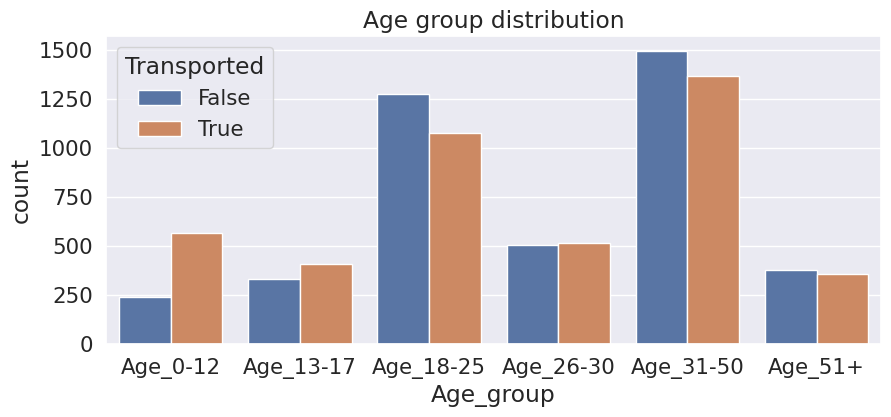

In [26]:
# 作成した特徴量に対して、グラフ化する
plt.figure(figsize=(10, 4))
g = sns.countplot(
    data = train,
    x = 'Age_group',
    hue = 'Transported',
    order = [
        'Age_0-12',
        'Age_13-17',
        'Age_18-25',
        'Age_26-30',
        'Age_31-50',
        'Age_51+'
    ]
)
plt.title('Age group distribution')

Age_0-12 については、transportedされている数が、そうでないのに比べ、多い